# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mayra Rahma Dianti
- **Email:** mayradianti@gmail.com
- **ID Dicoding:** mayra_rahma_dianti_oDfY

## Menentukan Pertanyaan Bisnis

- Produk apa yang paling banyak dan paling sedikit terjual?
- Bagaimana tingkat kepuasan pelanggan?
- Bagaimana distribusi geografis pelanggan terhadap penjualan?

## Import Semua Packages/Library yang Digunakan

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [78]:
customers_df = pd.read_csv('/content/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [79]:
geoloc_df = pd.read_csv('/content/geolocation_dataset.csv')
geoloc_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [80]:
order_items_df = pd.read_csv('/content/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [81]:
order_payments_df = pd.read_csv('/content/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [82]:
order_reviews_df = pd.read_csv('/content/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [83]:
orders_df = pd.read_csv('/content/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [84]:
product_category_df = pd.read_csv('/content/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [85]:
products_df = pd.read_csv('/content/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [86]:
sellers_df = pd.read_csv('/content/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**
- Data was sourced from ecommerce transaction providing product sales, customer reviews, and order details. The formats are numerical and categorical

### Assessing Data

In [87]:
print('\n', customers_df.info())
print('\n', geoloc_df.info())
print('\n', order_items_df.info())
print('\n', order_payments_df.info())
print('\n', order_reviews_df.info())
print('\n', orders_df.info())
print('\n', product_category_df.info())
print('\n', products_df.info())
print('\n', sellers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

In [88]:
print('\nNull customers:\n', customers_df.isna().sum())
print('\nNull geolocation:\n', geoloc_df.isna().sum())
print('\nNull order items:\n', order_items_df.isna().sum())
print('\nNull order payments:\n', order_payments_df.isna().sum())
print('\nNull order reviews:\n', order_reviews_df.isna().sum())
print('\nNull orders:\n', orders_df.isna().sum())
print('\nNull product category:\n', product_category_df.isna().sum())
print('\nNull products:\n', products_df.isna().sum())
print('\nNull sellers:\n', sellers_df.isna().sum())


Null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp    

In [89]:
print('\nJumlah duplikasi customers:\n', customers_df.duplicated().sum())
print('\nJumlah duplikasi geolocation:\n', geoloc_df.duplicated().sum())
print('\nJumlah duplikasi order items:\n', order_items_df.duplicated().sum())
print('\nJumlah duplikasi order payments:\n', order_payments_df.duplicated().sum())
print('\nJumlah duplikasi order reviews:\n', order_reviews_df.duplicated().sum())
print('\nJumlah duplikasi orders:\n', orders_df.duplicated().sum())
print('\nJumlah duplikasi product category:\n', product_category_df.duplicated().sum())
print('\nJumlah duplikasi products:\n', products_df.duplicated().sum())
print('\nJumlah duplikasi sellers:\n', sellers_df.duplicated().sum())


Jumlah duplikasi customers:
 0

Jumlah duplikasi geolocation:
 261831

Jumlah duplikasi order items:
 0

Jumlah duplikasi order payments:
 0

Jumlah duplikasi order reviews:
 0

Jumlah duplikasi orders:
 0

Jumlah duplikasi product category:
 0

Jumlah duplikasi products:
 0

Jumlah duplikasi sellers:
 0


In [90]:
print('\nDescribe customers:\n', customers_df.describe())
print('\nDescribe geolocation:\n', geoloc_df.describe())
print('\nDescribe order items:\n', order_items_df.describe())
print('\nDescribe order payments:\n', order_payments_df.describe())
print('\nDescribe order reviews:\n', order_reviews_df.describe())
print('\nDescribe orders:\n', orders_df.describe())
print('\nDescribe product category:\n', product_category_df.describe())
print('\nDescribe products:\n', products_df.describe())
print('\nDescribe sellers:\n', sellers_df.describe())


Describe customers:
        customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Describe geolocation:
        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02

Describe order items:
        order_item_id 

**Insight:**
- Most of the data is not null except in some column of data like order reviews, ordeers, products
- There are duplicate data in geolocation

### Cleaning Data

**Geolocation**

In [91]:
geoloc_df.drop_duplicates(inplace=True)

In [92]:
geoloc_df.duplicated().sum()

0

**Order_items**

In [93]:
order_items_column=['shipping_limit_date']
for col in order_items_column:
    order_items_df[col]=pd.to_datetime(order_items_df[col])

In [94]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Order reviews**

In [95]:
drop_cols = ['review_comment_title', 'review_comment_message']
order_reviews_df.drop(drop_cols, axis= 1, inplace= True)

In [96]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


In [97]:
order_review_col=['review_creation_date','review_answer_timestamp']
for col in order_review_col:
    order_reviews_df[col]=pd.to_datetime(order_reviews_df[col])

In [98]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


**Orders**

In [99]:
orders_col=[
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
for col in orders_col:
    orders_df[col]=pd.to_datetime(orders_df[col])

In [100]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Duplicate data in geolocation are removed
- Null columns also removed

## Exploratory Data Analysis (EDA)

### Explore customers_df

```
# This is formatted as code
```



In [101]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
36203,da702ab66677661dbee8ff4802eaf83a,bb29d972350d9b8b2e5bf6f5c3834f69,18125,aluminio,SP
52967,92349255be2950b2ecb56142b551070c,47b23c87420c414f59e6c0c3983bab3b,5773,sao paulo,SP
58038,4728e6e5731f670d79340da21b2e86d5,12c4dee2137f46228b93caaeb9cb1ccc,14169,sertaozinho,SP
64701,b9b38aee92229fb6ba88fbec878f1743,79ad2ad9d71899f7cf8b622f0575760f,96450,dom pedrito,RS
20205,338ee842af71339085c560431cfeae52,462b2c6696f784f657d2b03acb9357e1,13040,campinas,SP


In [102]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [103]:
customers_df.customer_id.is_unique

True

In [104]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [105]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore orders_df

In [106]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
93379,150a2a0e81d701cf7dac37b86e5235b0,36e63749ac0675e2ffbbd4cdba2ebe76,delivered,2018-04-25 20:44:52,2018-04-25 20:55:35,2018-04-26 12:35:00,2018-04-30 21:12:44,2018-05-18
11429,70ee631a6eb795832e5318331fdf56d3,44a03629944ecb00a4bd905084845f56,delivered,2018-07-31 14:20:47,2018-07-31 15:31:39,2018-08-17 15:08:00,2018-08-22 18:46:31,2018-08-31
59161,18b5c5e3d06b8ffb3935759ce29393f3,ab95418b637c62c3f1eae85f50c29c21,delivered,2017-05-26 20:06:30,2017-05-26 20:22:17,2017-05-29 11:55:55,2017-06-13 11:48:31,2017-06-20
50361,7b1250fe66e9056df3b6eeb2659dfb22,93d131a16e34c4a78d1627e56ac2ee83,delivered,2018-02-06 17:39:21,2018-02-06 17:52:13,2018-02-08 19:37:54,2018-02-19 17:16:38,2018-03-06
47799,3d7d0dcc28a6dfb5464b9b43e751e45f,6cf9369731b3d671fa5e5cb0d6d58f72,delivered,2017-08-09 21:42:31,2017-08-10 21:44:11,2017-08-11 20:48:08,2017-08-15 21:44:49,2017-08-22


In [107]:
delivery_time = orders_df["order_delivered_customer_date"] - orders_df["order_delivered_carrier_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)

In [108]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
64487,987cfe3348684fc007a1e9a4825eadb4,8bba830be57bad4ed0b40743372ce289,delivered,2018-04-02 14:26:59,2018-04-02 14:51:04,2018-04-04 18:31:41,2018-04-11 02:41:48,2018-04-18,6.0
92813,4374672f40f26ec3646cdc22c5f57733,9422ceca89675150ff5b567cf89f43b6,delivered,2017-07-10 17:44:35,2017-07-10 17:55:17,2017-07-11 18:12:07,2017-07-20 21:41:51,2017-08-01,9.0
58369,6c187850c87a918e0ac628d5ffd4d75a,6b39b1d56b466e46aeb889194235e77d,delivered,2018-04-04 19:51:29,2018-04-04 20:08:43,2018-04-05 19:49:26,2018-04-10 18:07:44,2018-05-02,5.0
54928,d326dcaaf349108b952ba7aba78eaa9d,34329f819a7c0bf45366202c3cbc5007,delivered,2018-01-22 22:01:48,2018-01-22 22:16:20,2018-01-23 18:07:43,2018-01-24 15:23:33,2018-02-06,1.0
4013,91894a6bee2407fdec8f29441d75541e,5d453be4ccf49d74d81b4e1f381dac15,delivered,2017-05-27 23:34:01,2017-05-27 23:45:20,2017-06-02 11:18:10,2017-06-19 20:57:41,2017-06-21,17.0


In [109]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99281,97658,96476,99441,96475.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232,9.292314
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-16.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00,4.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00,7.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00,12.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,205.000000


### Explore customers_df and orders_df

In [110]:
#merge
cust_orders_df = pd.merge(
    left=customers_df,
    right=orders_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
cust_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,2.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,14.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,3.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,10.0


In [111]:
cust_orders_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
campinas,1444
porto alegre,1379
salvador,1245
guarulhos,1189


### Explore order_payments_df

In [112]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
78550,cd553d196341933ae98c30c57be9f7e6,2,voucher,1,19.20
74930,0e958d055789e054bf7483acea302398,1,credit_card,4,48.21
78351,aea5a3457f531f97bc2b4a7cccbc1275,1,credit_card,2,125.93
26760,011375f941b3695c3c3ee58bfe0d3655,1,credit_card,2,144.29
15772,22d03f81f36cfd05e90af56d5dc63e74,1,credit_card,1,63.42


In [113]:
order_payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [114]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


### Explore order_payments and ordder_reviews

In [115]:
# Merge
order_paymentrev_df = pd.merge(
    left=order_payments_df,
    right=order_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
order_paymentrev_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,2017-12-21,2017-12-22 01:10:39


In [116]:
order_paymentrev_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [117]:
order_paymentrev_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
52415,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,2017-10-18,2017-10-19 13:10:39
34565,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,2018-07-27,2018-07-28 02:36:10
41660,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,2017-03-04,2017-03-04 21:40:41
49871,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaT,NaT
86018,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...
78326,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,2017-05-21,2017-05-24 16:21:27
51581,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.00,9efef4d70190c1bdb9b12872cc8144fc,3.0,2018-08-17,2018-08-18 15:32:40
37030,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.00,f28281373ab8815bafafe371218f02ce,1.0,2017-05-21,2017-05-24 16:21:27
94953,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.00,b54d02f7f1520b3995f84b77ab0dacb3,1.0,2018-08-24,2018-08-25 02:24:54


In [118]:
order_paymentrev_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19784         11.62   7274.88
credit_card     76505          0.01  13664.08
debit_card       1528         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3866          0.00   3184.34

### Explore cust_orders_df and order_paymentrev_df

In [119]:
customers_df = pd.merge(
    left=cust_orders_df,
    right=order_paymentrev_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,delivery_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,2.0,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,14.0,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,3.0,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,10.0,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,2018-08-10,2018-08-17 01:59:52


### Explore order_items_df and sellers_df

In [120]:
#merge
orderitems_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
orderitems_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [121]:
orderitems_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
guarulhos,50
ibitinga,49
santo andre,45
campinas,41


### Explore product_category_df and products_df

In [122]:
product_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [123]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


In [124]:
product_df.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name_english,
bed_bath_table,3029
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
auto,1900
computers_accessories,1639
toys,1411
watches_gifts,1329


### Explore product_df and orderitems_seller_df

In [125]:
sellers_df = pd.merge(
    left=product_df,
    right=orderitems_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [126]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [127]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

### Explore geoloc_df

In [128]:
geoloc_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
261210,11750,-24.326446,-47.015086,peruíbe,SP
811568,76490,-14.013370,-49.180307,mara rosa,GO
329429,14070,-21.108693,-47.794483,ribeirao preto,SP
545879,30180,-19.932837,-43.941369,belo horizonte,MG
524178,28909,-22.894234,-42.048282,cabo frio,RJ


### Explore all data

In [129]:
# Merge all data kecuali geoloc karena tidak berkaitan pada kasus
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [130]:
all_data.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

In [131]:
all_data.groupby(by="customer_city").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

,order_id,payment_value
customer_city,,
abadia dos dourados,3,413.50
abadiania,1,1025.52
abaete,12,1946.81
abaetetuba,11,6237.78
abaiara,2,332.15
...,...,...
xinguara,9,1726.63
xique-xique,3,230.56
zacarias,2,229.85


In [132]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score": "mean"
})

,order_id,review_score
product_category_name_english,,
agro_industry_and_commerce,182,4.150794
air_conditioning,253,3.969697
art,202,3.935484
arts_and_craftmanship,23,4.125000
audio,350,3.840849
...,...,...
stationery,2311,4.188339
tablets_printing_image,79,4.117647
telephony,4199,3.948849


In [133]:
all_data.to_csv('all_data.csv', index=False)

**Insight:**
- Customers data explores unique customer IDs, their geographical distribution by city and state, and their purchasing behavior.
Grouping customers by cities and states reveals which locations have the highest number of unique customers
- Orders data explores delivery times that calculated by subtracting delivery start dates from delivery completion dates, this show insights into logistical efficiency
- Payments data explores the different payment types, showing how many unique orders are associated with each method
- Geolocation data explores the location of which order is taken
- Datasets are merged to analyze more comprehensive customer, order, and payment behavior as a whole

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?

In [134]:
total_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
total_order_items_df = total_order_items_df.rename(columns={"product_id": "products"})
total_order_items_df = total_order_items_df.sort_values(by="products", ascending=False)
total_order_items_df = total_order_items_df.head(10)

total_order_items_df.head()

,product_category_name_english,products
7,bed_bath_table,11988
43,health_beauty,10032
65,sports_leisure,9004
39,furniture_decor,8832
15,computers_accessories,8150


In [135]:
total_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
total_order_items_df = total_order_items_df.rename(columns={"product_id": "products"})
total_order_items_df = total_order_items_df.sort_values(by="products", ascending=True)
total_order_items_df = total_order_items_df.head(10)

total_order_items_df.head()


,product_category_name_english,products
61,security_and_services,2
29,fashion_childrens_clothes,8
11,cds_dvds_musicals,14
52,la_cuisine,16
3,arts_and_craftmanship,24


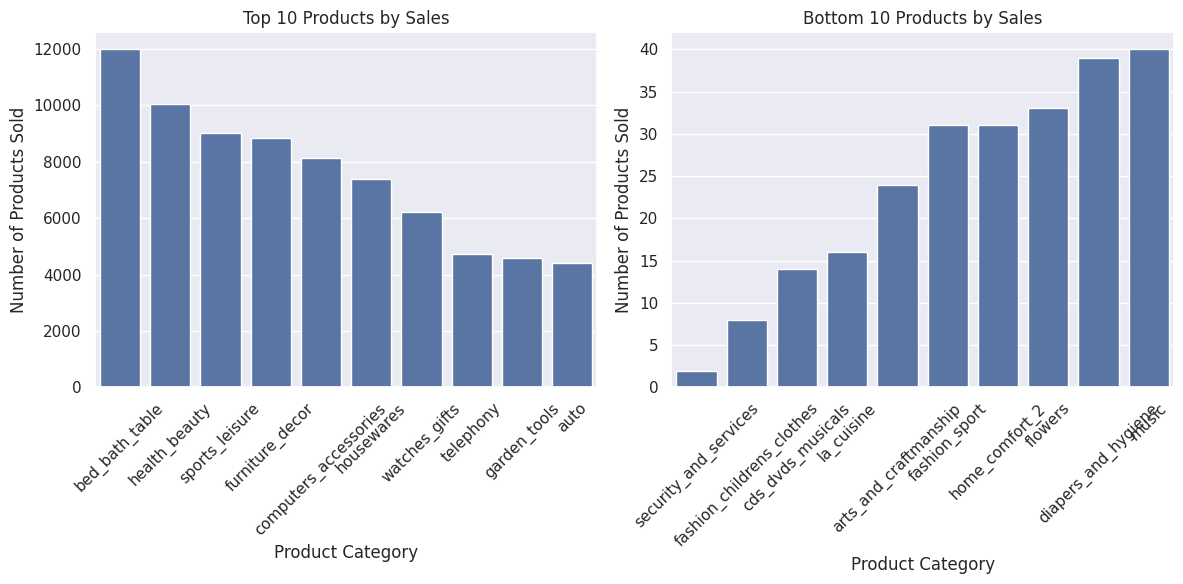

In [136]:
# Menghitung total penjualan per kategori
total_order_items_df = all_data.groupby("product_category_name_english")["product_id"].count().reset_index()
total_order_items_df = total_order_items_df.rename(columns={"product_id": "products"})

# Produk dengan penjualan tertinggi
top_products = total_order_items_df.sort_values(by="products", ascending=False).head(10)

# Produk dengan penjualan terendah
bottom_products = total_order_items_df.sort_values(by="products", ascending=True).head(10)

# Membuat bar plot untuk penjualan tertinggi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=top_products, x='product_category_name_english', y='products')
plt.title('Top 10 Products by Sales')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')

# Membuat bar plot untuk penjualan terendah
plt.subplot(1, 2, 2)
sns.barplot(data=bottom_products, x='product_category_name_english', y='products')
plt.title('Bottom 10 Products by Sales')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Number of Products Sold')

plt.tight_layout()
plt.show()

**Insight**
- Tingkat penjualan tertinggi terdapat pada produk dengan kategori bed_bath_table yang ditunjukkan dengan bar number of products sold paling tinggi
- Tingkat penjualan terendah terdapat pada produk dengan kategori security_and_Services yang ditunjukkan dengan bar number of products sold paling rendah

### Pertanyaan 2: Bagaimana tingkat kepuasan pelanggan?

<ipython-input-141-bb90e018a55e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need t

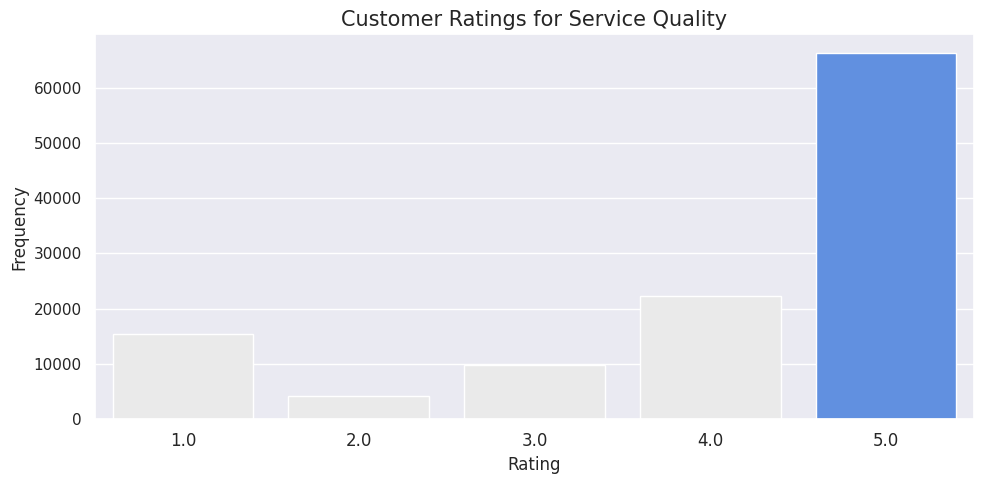

In [141]:
score_counts = all_data['review_score'].value_counts().sort_values(ascending=False)

bar_colors = ["#EAEAEA", "#EAEAEA", "#EAEAEA", "#EAEAEA", "#4C8BF5"]

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
colors = bar_colors
sns.barplot(x=score_counts.index,
            y=score_counts.values,
            palette=colors
            )

plt.title("Customer Ratings for Service Quality", fontsize=15)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**
- Most of the customers are satisfied by the service, proved by category rating 5.0 has the highest frequency

### Pertanyaan 3: Bagaimana distribusi geografis pelanggan terhadap penjualan?

In [138]:
# Mengelompokkan data berdasarkan negara bagian pelanggan dan menghitung jumlah unik customer_id
statewise_df = all_data.groupby("customer_state")['customer_id'].nunique().reset_index()

statewise_df.rename(columns={
    "customer_id": "total_customers"
}, inplace=True)

# Menampilkan lima baris pertama dari DataFrame yang baru
statewise_df.head()


,customer_state,total_customers
0,AC,81
1,AL,413
2,AM,148
3,AP,68
4,BA,3380


<ipython-input-142-3998aed9cc06>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_state',
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to 

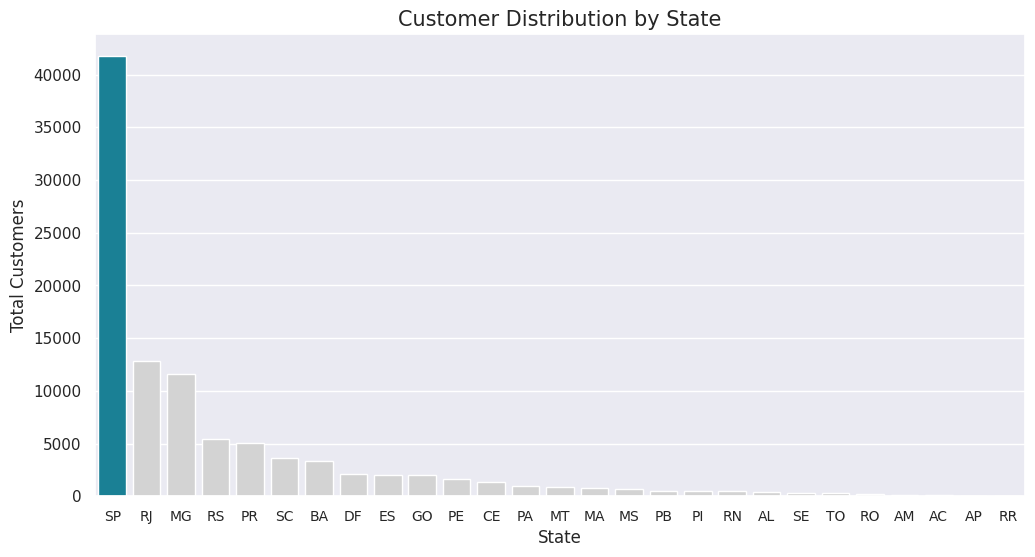

In [142]:
plt.figure(figsize=(12, 6))

top_state = statewise_df.loc[statewise_df['total_customers'].idxmax(), 'customer_state']

sorted_state_df = statewise_df.sort_values(by='total_customers', ascending=False)

sns.barplot(x='customer_state',
            y='total_customers',
            data=sorted_state_df,
            palette=["#068DA9" if state == top_state else "#D3D3D3" for state in sorted_state_df['customer_state']]
            )

plt.title("Customer Distribution by State", fontsize=15)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Customers", fontsize=12)
plt.xticks(fontsize=10)
plt.show()


<ipython-input-143-552c1e3b18c7>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_city_counts.index,
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will 

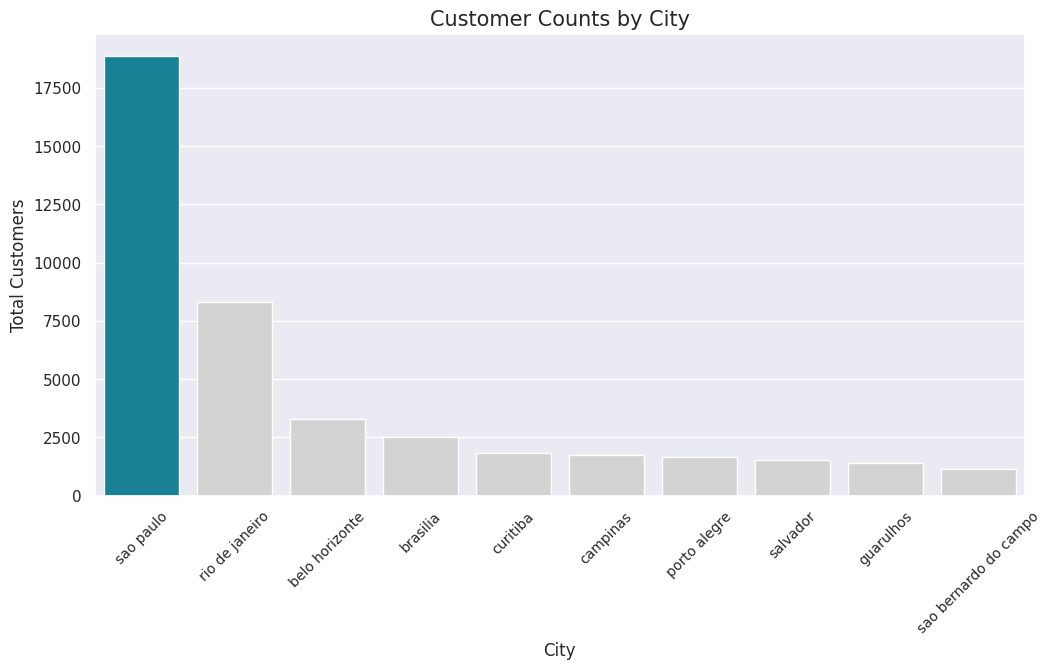

In [143]:
city_counts = all_data['customer_city'].value_counts().head(10)

plt.figure(figsize=(12, 6))

most_frequent_city = city_counts.idxmax()

sorted_city_counts = city_counts.sort_values(ascending=False)

sns.barplot(x=sorted_city_counts.index,
            y=sorted_city_counts.values,
            palette=["#068DA9" if city == most_frequent_city else "#D3D3D3" for city in sorted_city_counts.index]
            )

plt.title("Customer Counts by City", fontsize=15)
plt.xlabel("City", fontsize=12)
plt.ylabel("Total Customers", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()


**Insight:**
- Customer terbanyak terdapat pada state SP dan city Sao Paulo

## Analisis Lanjutan (opsional)

In [144]:
import datetime as dt

now = dt.datetime(2018, 10, 17)

all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

# Group by 'customer_id' and calculate Recency, Frequency, and Monetary
recency = (now - all_data.groupby('customer_id')['order_purchase_timestamp'].max()).dt.days
frequency = all_data.groupby('customer_id')['order_id'].count()
monetary = all_data.groupby('customer_id')['price'].sum()

In [145]:
rfm = pd.DataFrame({
    'customer_id': recency.index,
    'Recency': recency.values,
    'Frequency': frequency.values,
    'Monetary': monetary.values
})

# Percentiles
rfm_percentiles = rfm[['Recency', 'Frequency', 'Monetary']].rank(pct=True)

# RFM Segmentation
rfm['RFM_Score'] = rfm_percentiles['Recency'] * 100 + rfm_percentiles['Frequency'] * 10 + rfm_percentiles['Monetary']
rfm['RFM_Score'] = rfm['RFM_Score'].clip(0, 100)
rfm_segment = pd.cut(rfm['RFM_Score'], bins=[0, 33, 66, 100], labels=['Low', 'Mid', 'High'])
rfm['Segment'] = rfm_segment

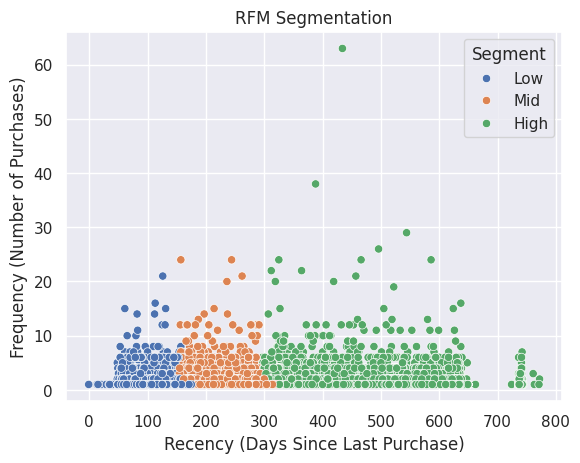

In [146]:
# Visualize RFM Segments
sns.scatterplot(x='Recency', y='Frequency', hue='Segment', data=rfm)
plt.title('RFM Segmentation')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Frequency (Number of Purchases)')
plt.show()

## Conclusion

- Conclution pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?
Hasil visualisasi bar plot menunjukkan plot dengan frekuensi tertinggi ada pada kategori bed_bath_table dan plot dengan frekuensi tertinggi ada pada kategori security_and_services. **Hal ini menunjukkan bahwa produk yang paling banyak terjual yaitu produk kategori bed_bath_table dan produk paling sedikit terjual yaitu produk kategori security_and_services.**

- Conclution pertanyaan 2: Bagaimana tingkat kepuasan pelanggan?
Plot grafik menunjukkan frekuensi rating paling tinggi berada pada kategori nilai 5.0 dibandingkan dengan kategori nilai rating lainnya. **Hal ini menunjukkan bahwa sebagian besar pelanggan sudah puas dengan pelayanan yang diberikan.**


- Conclution pertanyaan 3: Bagaimana distribusi geografis pelanggan terhadap penjualan?
Hasil plot total distribusi customer berdasarkan state menununjukkan bar dengan total customer paling tinggi yaitu state SP sedangkan berdasarkan city menunjukkan bar dengan total customer paling tinggi yaitu city Sao Paulo. **Hal ini menunjukkan bahwa market terbesar penjualan berada pada state SP dan city Sao Paulo**